In [2]:
import sklearn; 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
from collections import Counter
import scipy 
from scipy.stats import multivariate_normal
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from helpers.iaml_cw2_helpers import *
from iaml212cw2_my_helpers import *
mpl.rcParams['font.size'] = 16
print(sklearn.__version__)

0.24.2


In [3]:
Xtrn_org, Ytrn_org, Xtst_org, Ytst_org = load_Q2_dataset ()
Xtrn = Xtrn_org / 255.0
Xtst = Xtst_org / 255.0
Ytrn = Ytrn_org - 1
Ytst = Ytst_org - 1
Xmean = np . mean( Xtrn , axis =0)
Xtrn_m = Xtrn - Xmean; Xtst_m = Xtst - Xmean # Mean−normalised

# 2.1

In [4]:



dfQ1 = pd.DataFrame(columns=['min', 'max', 'mean', 'std'])
dfQ1.loc['Xtrn'] = [Xtrn.max(), Xtrn.min(), Xtrn.mean(), Xtrn.std()]
dfQ1.loc['Xtst'] = [Xtst.max(), Xtst.min(), Xtst.mean(), Xtst.std()]
dfQ1

,min,max,mean,std
Xtrn,1.0,0.0,0.177377,0.334982
Xtst,1.0,0.0,0.175634,0.333463


Text(0.5, 1.0, 'Image of class 2')

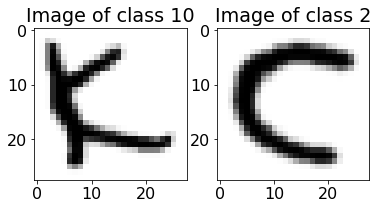

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(6,10))
ax1.imshow(Xtrn[0].reshape(28,28).T, cmap='gray_r')
ax1.set_title("Image of class " + str(Ytrn[0]))
ax2.imshow(Xtrn[1].reshape(28,28).T, cmap='gray_r')
ax2.set_title("Image of class " + str(Ytrn[1]))

# 2.3

In [6]:


all_centers = [ [ [] for a in range(3) ] for b in range(2) ]
i = 0


for k in [3,5]: 
    j = 0
    for b in [0,5,8]: 
        idx = np.where(Ytrn == b)
        currXtrn = Xtrn[idx[0]]
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(currXtrn)  
        center = kmeans.cluster_centers_
        all_centers[i][j] = center
        j += 1
    i += 1

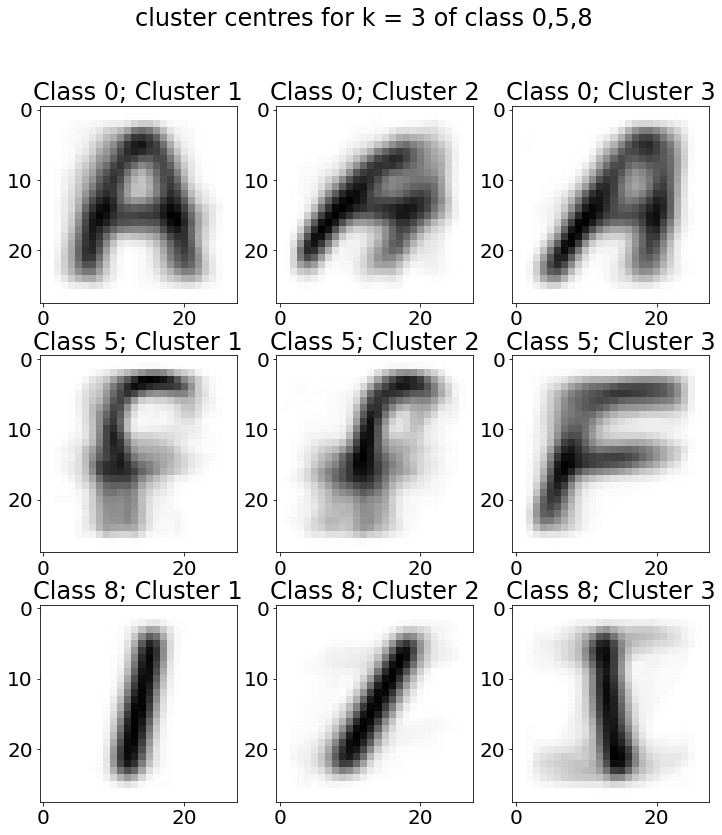

In [201]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3,figsize=(12,13))
fig.suptitle('cluster centres for k = 3 of class 0,5,8')
ax1.imshow(all_centers[0][0][0].reshape(28,28).T, cmap='gray_r')
ax1.set_title("Class 0; Cluster 1")
ax2.imshow(all_centers[0][0][1].reshape(28,28).T, cmap='gray_r')
ax2.set_title("Class 0; Cluster 2")
ax3.imshow(all_centers[0][0][2].reshape(28,28).T, cmap='gray_r')
ax3.set_title("Class 0; Cluster 3")
ax4.imshow(all_centers[0][1][0].reshape(28,28).T, cmap='gray_r')
ax4.set_title("Class 5; Cluster 1")
ax5.imshow(all_centers[0][1][1].reshape(28,28).T, cmap='gray_r')
ax5.set_title("Class 5; Cluster 2")
ax6.imshow(all_centers[0][1][2].reshape(28,28).T, cmap='gray_r')
ax6.set_title("Class 5; Cluster 3")
ax7.imshow(all_centers[0][2][0].reshape(28,28).T, cmap='gray_r')
ax7.set_title("Class 8; Cluster 1")
ax8.imshow(all_centers[0][2][1].reshape(28,28).T, cmap='gray_r')
ax8.set_title("Class 8; Cluster 2")
ax9.imshow(all_centers[0][2][2].reshape(28,28).T, cmap='gray_r')
ax9.set_title("Class 8; Cluster 3")
mpl.rcParams['font.size'] = 28
plt.show()

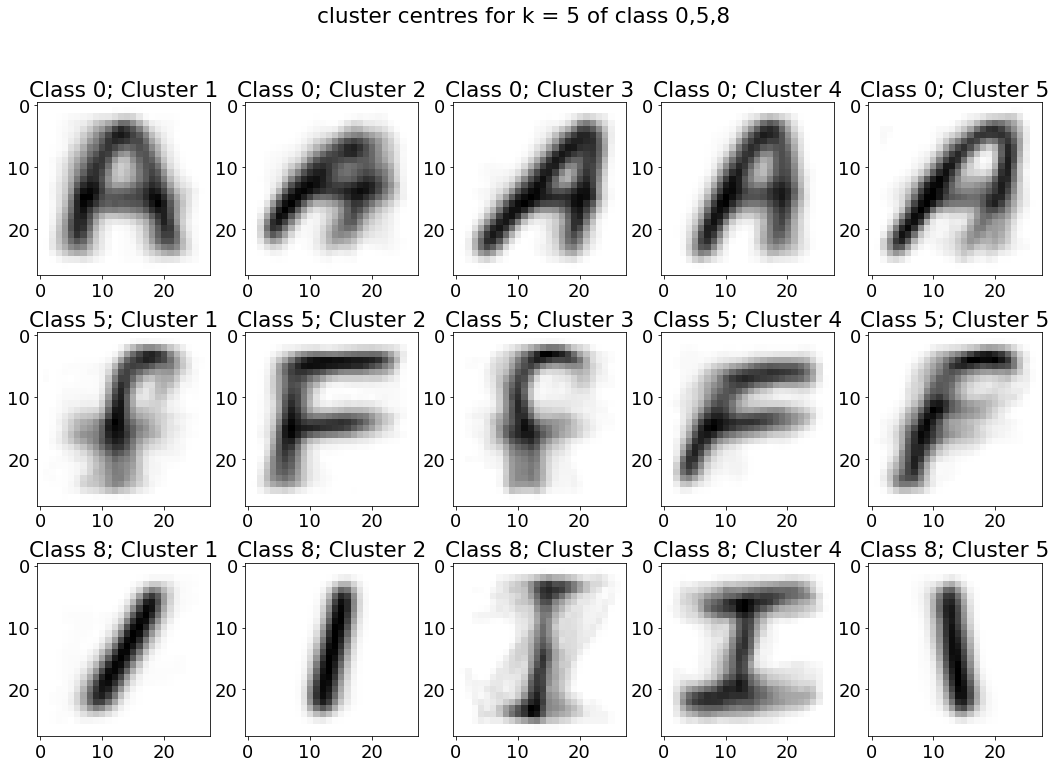

In [188]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10), (ax11, ax12, ax13, ax14, ax15)) = plt.subplots(3,5,figsize=(18,12))
fig.suptitle('cluster centres for k = 5 of class 0,5,8')

ax1.imshow(all_centers[1][0][0].reshape(28,28).T, cmap='gray_r')
ax1.set_title("Class 0; Cluster 1")
ax2.imshow(all_centers[1][0][1].reshape(28,28).T, cmap='gray_r')
ax2.set_title("Class 0; Cluster 2")
ax3.imshow(all_centers[1][0][2].reshape(28,28).T, cmap='gray_r')
ax3.set_title("Class 0; Cluster 3")
ax4.imshow(all_centers[1][0][3].reshape(28,28).T, cmap='gray_r')
ax4.set_title("Class 0; Cluster 4")
ax5.imshow(all_centers[1][0][4].reshape(28,28).T, cmap='gray_r')
ax5.set_title("Class 0; Cluster 5")

ax6.imshow(all_centers[1][1][0].reshape(28,28).T, cmap='gray_r')
ax6.set_title("Class 5; Cluster 1")
ax7.imshow(all_centers[1][1][1].reshape(28,28).T, cmap='gray_r')
ax7.set_title("Class 5; Cluster 2")
ax8.imshow(all_centers[1][1][2].reshape(28,28).T, cmap='gray_r')
ax8.set_title("Class 5; Cluster 3")
ax9.imshow(all_centers[1][1][3].reshape(28,28).T, cmap='gray_r')
ax9.set_title("Class 5; Cluster 4")
ax10.imshow(all_centers[1][1][4].reshape(28,28).T, cmap='gray_r')
ax10.set_title("Class 5; Cluster 5")

ax11.imshow(all_centers[1][2][0].reshape(28,28).T, cmap='gray_r')
ax11.set_title("Class 8; Cluster 1")
ax12.imshow(all_centers[1][2][1].reshape(28,28).T, cmap='gray_r')
ax12.set_title("Class 8; Cluster 2")
ax13.imshow(all_centers[1][2][2].reshape(28,28).T, cmap='gray_r')
ax13.set_title("Class 8; Cluster 3")
ax14.imshow(all_centers[1][2][3].reshape(28,28).T, cmap='gray_r')
ax14.set_title("Class 8; Cluster 4")
ax15.imshow(all_centers[1][2][4].reshape(28,28).T, cmap='gray_r')
ax15.set_title("Class 8; Cluster 5")
mpl.rcParams['font.size'] = 17.5
plt.show()

# 2.5

In [9]:


log_reg = LogisticRegression(max_iter=1000, random_state=0)
log_reg.fit(Xtrn_m, Ytrn)
y_preds = log_reg.predict(Xtst_m)
print("Training set Accuracy:", accuracy_score(Ytrn, log_reg.predict(Xtrn_m)))
print("Test set Accuracy:", accuracy_score(Ytst, y_preds))

Training set Accuracy: 0.9161538461538462
Test set Accuracy: 0.7223076923076923


In [10]:


misclassiﬁed = [x[1] for x in zip(y_preds, Ytst) if x[0] != x[1]]
c = Counter(misclassiﬁed)
c.most_common(5)

[(11, 53), (17, 48), (8, 42), (10, 38), (13, 36)]

# 2.6

In [67]:
pca = PCA()
projected = pca.fit_transform(Xtrn_m)


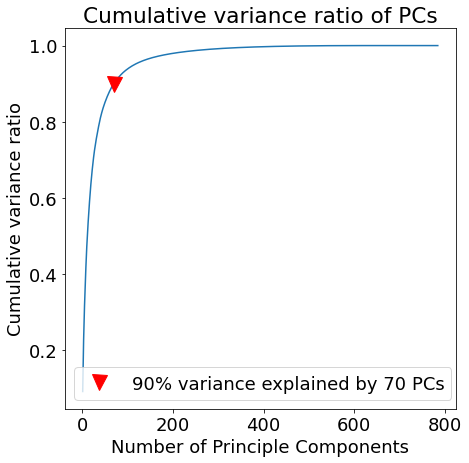

In [204]:
# DO PCA FOR PREPROCESSING, get appropriate PCs to drop 
# Preserve 90% of original variance 

var_ratio = pca.explained_variance_ratio_
cumvar_ratio = np.cumsum(var_ratio)

idx = 0
total = 0
for i in var_ratio:
    idx += 1
    total += i
    if total >= 0.9:
        break
        
plt.figure(figsize=(7,7))
plt.plot(np.arange(1,785), cumvar_ratio, label='_nolegend_')
plt.plot (idx, 0.9, 'v', c = 'r', markersize=15)

plt.legend(['90% variance explained by ' + str(idx) + ' PCs'])
plt.title("Cumulative variance ratio of PCs")
plt.xlabel("Number of Principle Components")
plt.ylabel("Cumulative variance ratio")
mpl.rcParams['font.size'] = 20
plt.show()

In [156]:
# baseline logistic regression, grid search finding optimal C value 

from sklearn.model_selection import GridSearchCV
grid={"C":[0.001,0.01,0.1,1,10,100]}

log_reg = LogisticRegression(max_iter=1000, random_state=0)
log_reg_cv=GridSearchCV(log_reg,grid,cv=3, return_train_score=True)
log_reg_cv.fit(Xtrn_m, Ytrn)


/Users/irwinchay/opt/anaconda3/envs/py3iaml/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/irwinchay/opt/anaconda3/envs/py3iaml/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000, random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [157]:
log_reg_cv.cv_results_

{'mean_fit_time': array([ 0.54938563,  1.14080175,  2.30748296,  5.25084201, 12.30586799,
        24.01807189]),
 'std_fit_time': array([0.084293  , 0.05250004, 0.09184621, 0.09231367, 0.53014873,
        0.66239165]),
 'mean_score_time': array([0.00666293, 0.0063866 , 0.00629052, 0.00618267, 0.00648125,
        0.00662096]),
 'std_score_time': array([6.19843351e-04, 1.72128344e-04, 2.19222423e-04, 4.26993409e-05,
        3.25193988e-04, 3.36160182e-04]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.64269231, 0.70807692, 0.73384615, 0.71538462, 0.67653846,
        0.66038462]),
 'split1_test_score': array([0.65153846, 0.72769231, 0.75038462, 0.71653846, 0.67346154,
        0.65653846]),
 'split2_test_score': array([0.64961538, 0.715

In [158]:
# assign pre processed data from PCA to PCA_LG model, grid search to find optimum hyper parameter C 

Xtrn_m_pca = projected[:,:70]
new_Xtst_m = pca.transform(Xtst_m)[:,:70]


log_reg_pca = LogisticRegression(max_iter=1000, random_state=0)
log_reg_pca_cv=GridSearchCV(log_reg_pca,grid,cv=3, return_train_score=True)
log_reg_pca_cv.fit(Xtrn_m_pca, Ytrn)


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000, random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [165]:
# Use bset hyper parameter from grid search, test on test set 

log_reg_base_best = LogisticRegression(max_iter=1000, C=0.1, random_state=0)
log_reg_base_best.fit(Xtrn_m, Ytrn)
y_preds = log_reg_base_best.predict(Xtst_m)
print("Test set Accuracy:", accuracy_score(Ytst, y_preds))

log_reg_pca_best = LogisticRegression(max_iter=1000, C=0.1, random_state=0)
log_reg_pca_best.fit(Xtrn_m_pca, Ytrn)
y_preds_pca = log_reg_pca_best.predict(new_Xtst_m)
print("Test set Accuracy:", accuracy_score(Ytst, y_preds_pca))

Test set Accuracy: 0.7473076923076923
Test set Accuracy: 0.7496153846153846


In [181]:
# get training time 

log_reg_pca_cv.cv_results_['mean_fit_time']/log_reg_cv.cv_results_['mean_fit_time']

array([0.23761045, 0.30903536, 0.31885968, 0.22130264, 0.20632782,
       0.25539498])

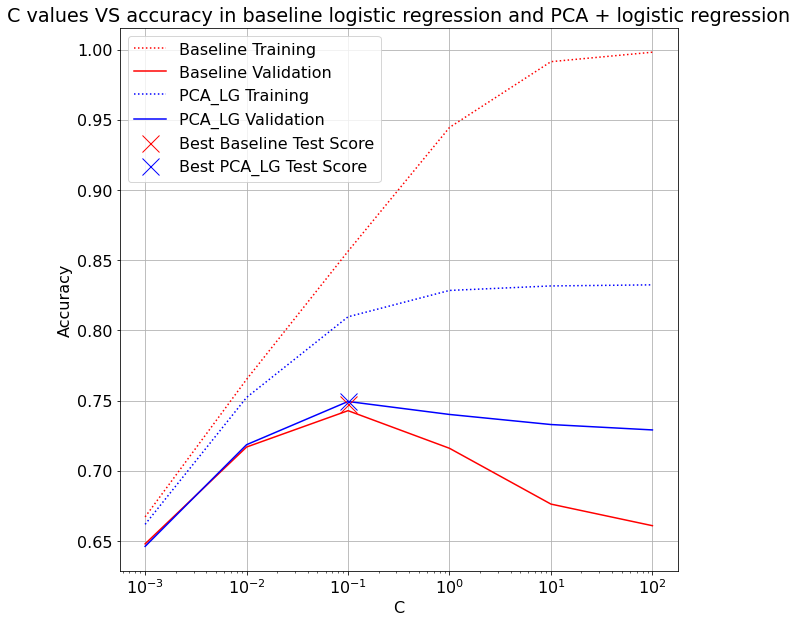

In [182]:
# plot the graph 

base_result = log_reg_cv.cv_results_
pca_result = log_reg_pca_cv.cv_results_


c = [0.001, 0.01, 0.1, 1, 10, 100]
base_train_acc = base_result['mean_train_score']
base_val_acc = base_result['mean_test_score']
pca_train_acc = pca_result['mean_train_score']
pca_val_acc = pca_result['mean_test_score']

plt.figure(figsize=(10,10))
plt.plot(c, base_train_acc, ':', c='r')
plt.plot(c, base_val_acc, c='r')
plt.plot(c, pca_train_acc,':', c='b')
plt.plot(c, pca_val_acc, c='b')
plt.plot (0.1, 0.7473076923076923, 'x', c = 'r', markersize=17)
plt.plot (0.1, 0.7496153846153846, 'x', c = 'b', markersize=17)
plt.grid()

plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('C values VS accuracy in baseline logistic regression and PCA + logistic regression')
plt.legend(labels=['Baseline Training', 'Baseline Validation', 'PCA_LG Training', 'PCA_LG Validation', 'Best Baseline Test Score', 'Best PCA_LG Test Score'])
plt.show()

# 2.7

In [11]:
idx = np.where(Ytrn == 0)
Xtrn_m_a = Xtrn_m[idx[0]]
mean_vector = np.mean(Xtrn_m_a, axis=0)
unbiased_cov_matrix = np.cov (Xtrn_m_a.T, ddof = 1)
[unbiased_cov_matrix.max(), unbiased_cov_matrix.min(), unbiased_cov_matrix.mean()]

[0.18378613679585562, -0.09747401775408393, 0.001708791632836062]

In [12]:
diag_cov = unbiased_cov_matrix.diagonal()
[diag_cov.max(), diag_cov.min(), diag_cov.mean()]

[0.18378613679585562, 0.0, 0.07231314807821394]

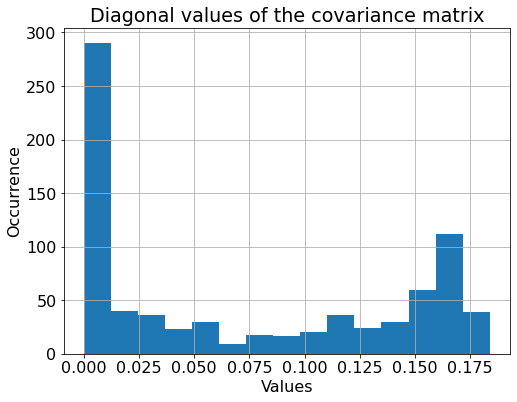

In [13]:
fig = plt.figure(figsize=(8,6))
plt.hist(diag_cov, bins = 15)
plt.grid()
plt.xlabel('Values')
plt.ylabel('Occurrence')
plt.title('Diagonal values of the covariance matrix')
plt.show()

In [14]:
from scipy.stats import multivariate_normal

idx = np.where(Ytst == 0)
first_element = Xtst_m[idx[0]][0]


multivariate_normal.pdf(first_element, mean_vector, unbiased_cov_matrix)


LinAlgError: singular matrix

# 2.8

In [15]:
from sklearn.mixture import GaussianMixture


idx = np.where(Ytst == 0)
Xtst_m_a = Xtst_m[idx[0]]

gmm_a = GaussianMixture(n_components=1, covariance_type= 'full')
gmm_a.fit(Xtrn_m_a)
score_tst = gmm_a.score([Xtst_m_a[0]])
score_tst

-838252.1823764594

In [16]:
tst_scores = []
likelihoods_test = []
likelihoods_train = []

for i in range(0,26): 

    
    Xtrn_m_i = Xtrn_m [Ytrn == i]

    
    gmm = GaussianMixture(n_components=1, covariance_type='full')
    gmm.fit(Xtrn_m_i)
    ltest = gmm.score_samples (Xtst_m)
    ltrain = gmm.score_samples (Xtrn_m)
    

    likelihoods_test.append(ltest)
    likelihoods_train.append(ltrain)

    
    



In [17]:
re_likelihoods_test = np.vstack(likelihoods_test).T
re_likelihoods_train = np.vstack(likelihoods_train).T

y_pred_test = [np.argmax(row) for row in re_likelihoods_test]
y_pred_train = [np.argmax(row) for row in re_likelihoods_train]

print("Accuracy for TRAINING set:", sklearn.metrics.accuracy_score(Ytrn, y_pred_train))
print (len (Xtrn_m[Ytrn == y_pred_train]))
print("Accuracy for TEST set:", sklearn.metrics.accuracy_score(Ytst, y_pred_test))
print (len (Xtst_m[Ytst == y_pred_test]))



Accuracy for TRAINING set: 1.0
7800
Accuracy for TEST set: 0.6934615384615385
1803
